# Data Cleaning for NLP Project
Please donot delete other's code, and test new codes at the end of the notebook before adding to the final cell

In [2]:
import pickle
import pandas as pd
data = pickle.load(open("/content/Cleaned_Transcript.pickle", "rb"))

In [3]:
data.head()
# You can resize the column width by dragging over the column border, just like MS Word

,Artist,Title,Transcript,Cleaned_Transcript,Tokens
0,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock Total Blackout: The Tamborine Exten...,"[Jimmy Fallon] Were you at the, uh, White Hous...",were you at the uh white house party yes i was...,"[uh, white, house, party, yes, white, house, e..."
1,"Bo Burnham: Words, Words, Words (2010) – Trans...","Bo Burnham: Words, Words, Words (2010) – Trans...",(Cheers and applause)\nThank you.\n(Laughter)\...,thank you when i say hey you say ho hey ho hey...,"[thank, say, hey, say, ho, hey, ho, hey, ho, b..."
2,Vir Das: Outside in – The Lockdown Special (20...,Vir Das: Outside in – The Lockdown Special (20...,[soft piano music playing]\n[Vir Das] What you...,what you are about to watch was not supposed t...,"[watch, supposed, happen, completely, unscript..."
3,Larry the Cable Guy – Remain Seated (2020) – T...,Larry the Cable Guy – Remain Seated (2020) – T...,"[Announcer] Ladies and gentlemen, Larry, The C...",ladies and gentlemen larry the cable guy all r...,"[lady, gentleman, larry, cable, guy, right, th..."
4,Craig Ferguson: Just Being Honest (2015) – Tra...,Craig Ferguson: Just Being Honest (2015) – Tra...,Watch the full show for free on YouTube\n[bagp...,watch the full show for free on youtube its a ...,"[watch, full, show, free, youtube, great, day,..."


In [4]:
print("{:10s}{}\n{:10s}{}".format("Columns:", data.columns.values, "Shape:", data.shape))

Columns:  ['Artist' 'Title' 'Transcript' 'Cleaned_Transcript' 'Tokens']
Shape:    (2071, 5)


In [ ]:
print(data.iloc[2,2])

[soft piano music playing]
[Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. It’s just… a moment in time. When the world shut down, we decided to do 30 shows for charity, just to raise money for COVID relief. And every night, I’d ask people the same question. What’s the first thing you’re gonna do, the first thing, when this world reopens? Welcome to lockdown day. I don’t know what day it is. That’s the thing about the entire world going through the same thing at the same time. I guess it’s special. All right. What’s up! What’s up, everyone? Hello! Good evening, and welcome to what promises to be the strangest stand-up comedy gig that you and I have both ever been a part of. If you’re not using earphones, what I ask is that you get as close to the device as you possibly can so that I can hear you laugh. Because if I cannot hear you laugh, then it’s just me in a room talking to myself, worried that I’m going to die. We’

## Data Cleaning - Final


#### Importing Dependencies

In [ ]:
! pip install contractions==0.0.48
! pip install nltk
import re
import string
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import download as nltk_download
nltk_download("stopwords")
nltk_download('punkt')
nltk_download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Creating Dictionaries for Mapping

In [ ]:
# print(*set(re.findall(r"\w+\*\w+", "\n\n".join(data.iloc[:, 2]).lower())), sep="\n")

In [ ]:
profanity = set(re.findall(r"\w+\*\w+", "\n\n".join(data.iloc[:, 2]).lower()))
profanity_dict = dict()
for i in profanity:
    if i[0] == "a":
        profanity_dict[i] = re.sub("\*", "s", i)
    elif i[0] == "b" or i[0] == "n":
        profanity_dict[i] = re.sub("\*", "i", i)
    elif i[0:2] == "fa":
        profanity_dict[i] = re.sub("\*", "g", i)
    else:
        profanity_dict[i] = re.sub("\*", "u", i)
del profanity
punctuations = "[\\"+"\\".join(list(string.punctuation))+"]"
stop_words = set(stopwords.words("english"))

In [ ]:
#profanity_dict
# print(punctuations)
# stop_words

#### Cleaning Data for unnecessary characters

In [ ]:
def clean_data(x):
    x = x.lower()
    for censor, uncensor in profanity_dict.items():
        x.replace(censor, uncensor)
    x = re.sub(r"\(.*?\)", '', re.sub(r"\[.*?\]", '', x))
    x = x.encode(encoding="ascii", errors="ignore").decode()
    x = contractions.fix(x, slang=True)
    x = re.sub(punctuations, ' ', x)
    x = re.sub("[″♬`¶¢\‘\—×“¡»®♫\…\–′’¿£♪”]", ' ', x)
    # x = re.sub("[0-9]+", "<NUM>", x)
    x = re.sub("[0-9]+", " ", x)
    _RE_COMBINE_WHITESPACE = re.compile(r"\s+")
    x = _RE_COMBINE_WHITESPACE.sub(" ", x).strip()
    return x
data['Cleaned_Transcript'] = data['Transcript'].apply(clean_data)

#### Tokenization and Lemmatization

In [ ]:
def tokenize_lemmatize(x):
    tokens = [word for word in word_tokenize(x) if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # print(tokens) 
    return tokens
# tokenize_data = lambda x : [word for word in nltk.word_tokenize(x) if word not in stop_words]
data['Tokens'] = data['Cleaned_Transcript'].apply(tokenize_lemmatize)

### Cleaning Artist Names

In [ ]:
def artist_name(x):
    x = x.lower()
    x = x.split(":")
    if x[0] == "protected":
        return " ".join(x[1].split()[:2])
    elif ("comedy central" in x[0]) or ("latin history" in x[0]):
        return " ".join(x[1].split()[:2])
    elif "gabriel" in x[0]:
        return "gabriel iglesias"
    elif "larry" in x[0]:
        return " ".join(x[0].split()[:4])
    elif len(x[0]) > 3:
        return " ".join(x[0].split()[:2])
    else:
        return x

In [ ]:
data['Artist_Cleaned'] = data['Artist'].apply(artist_name)

In [ ]:
data.head()

,Artist,Title,Transcript,Cleaned_Transcript,Tokens,Artist_Cleaned
0,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock Total Blackout: The Tamborine Exten...,"[Jimmy Fallon] Were you at the, uh, White Hous...",were you at the uh white house party yes i was...,"[uh, white, house, party, yes, white, house, e...",chris rock
1,"Bo Burnham: Words, Words, Words (2010) – Trans...","Bo Burnham: Words, Words, Words (2010) – Trans...",(Cheers and applause)\nThank you.\n(Laughter)\...,thank you when i say hey you say ho hey ho hey...,"[thank, say, hey, say, ho, hey, ho, hey, ho, b...",bo burnham
2,Vir Das: Outside in – The Lockdown Special (20...,Vir Das: Outside in – The Lockdown Special (20...,[soft piano music playing]\n[Vir Das] What you...,what you are about to watch was not supposed t...,"[watch, supposed, happen, completely, unscript...",vir das
3,Larry the Cable Guy – Remain Seated (2020) – T...,Larry the Cable Guy – Remain Seated (2020) – T...,"[Announcer] Ladies and gentlemen, Larry, The C...",ladies and gentlemen larry the cable guy all r...,"[lady, gentleman, larry, cable, guy, right, th...",larry the cable guy
4,Craig Ferguson: Just Being Honest (2015) – Tra...,Craig Ferguson: Just Being Honest (2015) – Tra...,Watch the full show for free on YouTube\n[bagp...,watch the full show for free on youtube its a ...,"[watch, full, show, free, youtube, great, day,...",craig ferguson


In [ ]:
data['Artist_Cleaned'].nunique()

172

In [ ]:
pickle.dump(data, open("Cleaned_Transcript.pickle", "wb"))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data["Cleaned_Transcript"])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data['Artist_Cleaned']
data_dtm = data_dtm.reset_index().groupby("Artist_Cleaned").sum()

In [ ]:
data_dtm.to_pickle("document_term_matrix.pickle")

# Data Visualization for NLP Project
Please donot delete other's code, and test new codes at the end of the notebook before adding to the final cell

In [ ]:
data = pickle.load(open("Cleaned_Transcript.pickle", "rb"))

In [ ]:
data.columns

Index(['Artist', 'Title', 'Transcript', 'Cleaned_Transcript', 'Tokens'], dtype='object')

In [ ]:
data.head()

,Artist,Title,Transcript,Cleaned_Transcript,Tokens
0,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock Total Blackout: The Tamborine Exten...,"[Jimmy Fallon] Were you at the, uh, White Hous...",were you at the uh white house party yes i was...,"[uh, white, house, party, yes, white, house, e..."
1,"Bo Burnham: Words, Words, Words (2010) – Trans...","Bo Burnham: Words, Words, Words (2010) – Trans...",(Cheers and applause)\nThank you.\n(Laughter)\...,thank you when i say hey you say ho hey ho hey...,"[thank, say, hey, say, ho, hey, ho, hey, ho, b..."
2,Vir Das: Outside in – The Lockdown Special (20...,Vir Das: Outside in – The Lockdown Special (20...,[soft piano music playing]\n[Vir Das] What you...,what you are about to watch was not supposed t...,"[watch, supposed, happen, completely, unscript..."
3,Larry the Cable Guy – Remain Seated (2020) – T...,Larry the Cable Guy – Remain Seated (2020) – T...,"[Announcer] Ladies and gentlemen, Larry, The C...",ladies and gentlemen larry the cable guy all r...,"[lady, gentleman, larry, cable, guy, right, th..."
4,Craig Ferguson: Just Being Honest (2015) – Tra...,Craig Ferguson: Just Being Honest (2015) – Tra...,Watch the full show for free on YouTube\n[bagp...,watch the full show for free on youtube its a ...,"[watch, full, show, free, youtube, great, day,..."


In [ ]:
data = pd.read_pickle('document_term_matrix.pickle').transpose()

In [ ]:
data.head()

Artist_Cleaned,adam devine,adam sandler,adel karam,aditi mittal,al madrigal,ali wong,amanda seales,amy schumer,andy woodhull,anjelah johnson,anthony jeselnik,ari shaffir,arsenio hall,aziz ansari,bert kreischer,big jay,bill burr,bill hicks,bill maher,bill maher…,billy connolly,bo burnham,brad williams,"brazil, corruption",brent morin,brian regan,bridget everett,carlin at,cedric the,chelsea peretti,chris d’elia,chris gethard,chris rock,chris tucker,christina pazsitzky,colin quinn,craig ferguson,cristela alonzo,d.l. hughley,dan soder,...,ray romano,reggie watts,richard pryor,richard pryor’s,ricky gervais,rob schneider,robin williams,ron white,ronny chieng,rory scovel,rowan atkinson,roy wood,russell brand,russell howard,russell peters,ryan hamilton,sam jay,sam morril,sara pascoe,sarah millican,sarah silverman,saturday night,sebastian maniscalco,seth meyers,sincerely louis,stewart lee,t.j. miller,the standups,tiffany haddish,todd barry,todd glass,tom segura,trevor noah,urzila carlson,vir das,volker pispers,w. kamau,wanda sykes,whitney cummings,zakir khan
aa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
aaa,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
aaaaaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaaaaaaaaaall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Find the top 30 words said by each comedian

In [ ]:

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
# top_dict

### Print the top 15 words said by each comedian

In [ ]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('-'*100, "\n")

adam devine
like, know, just, right, guys, did, going, fuck, man, yeah, time, got, shit, ass
---------------------------------------------------------------------------------------------------- 

adam sandler
like, fucking, know, got, yeah, just, right, phone, oh, fuck, going, guy, okay, kids
---------------------------------------------------------------------------------------------------- 

adel karam
said, like, know, dani, guy, kiss, hes, just, class, came, got, going, come, night
---------------------------------------------------------------------------------------------------- 

aditi mittal
like, know, yeah, just, think, going, said, comedy, right, people, okay, um, time, really
---------------------------------------------------------------------------------------------------- 

al madrigal
like, going, got, just, want, know, right, little, did, people, ha, time, house, old
---------------------------------------------------------------------------------------------------- 



### Look at the most common top words --> add them to the stop word list (Optional Cleaning based on requirement)

In [ ]:
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

    Aggregating list of most common words in routines of different comedians

In [ ]:
Counter(words).most_common()

[('know', 168),
 ('just', 167),
 ('like', 165),
 ('going', 165),
 ('did', 162),
 ('right', 158),
 ('got', 158),
 ('want', 147),
 ('people', 135),
 ('oh', 129),
 ('time', 125),
 ('think', 125),
 ('yeah', 118),
 ('say', 112),
 ('good', 105),
 ('hes', 93),
 ('said', 90),
 ('man', 88),
 ('shit', 80),
 ('fuck', 79),
 ('really', 79),
 ('look', 79),
 ('little', 75),
 ('thing', 74),
 ('come', 73),
 ('fucking', 69),
 ('okay', 69),
 ('let', 67),
 ('guy', 60),
 ('guys', 54),
 ('love', 54),
 ('does', 50),
 ('tell', 44),
 ('way', 43),
 ('make', 40),
 ('hey', 38),
 ('mean', 38),
 ('day', 38),
 ('thank', 37),
 ('goes', 35),
 ('uh', 34),
 ('ill', 31),
 ('god', 28),
 ('white', 28),
 ('went', 26),
 ('black', 25),
 ('need', 24),
 ('lot', 23),
 ('life', 22),
 ('women', 22),
 ('kids', 20),
 ('old', 19),
 ('ass', 18),
 ('kind', 18),
 ('dad', 18),
 ('doing', 17),
 ('wife', 16),
 ('yes', 15),
 ('dick', 15),
 ('feel', 15),
 ('years', 15),
 ('things', 14),
 ('woman', 13),
 ('mom', 12),
 ('dude', 12),
 ('big', 1

    If more than half of the comedians have it as a top word, exclude it from the list

In [ ]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 50]
add_stop_words

['know',
 'just',
 'like',
 'going',
 'did',
 'right',
 'got',
 'want',
 'people',
 'oh',
 'time',
 'think',
 'yeah',
 'say',
 'good',
 'hes',
 'said',
 'man',
 'shit',
 'fuck',
 'really',
 'look',
 'little',
 'thing',
 'come',
 'fucking',
 'okay',
 'let',
 'guy',
 'guys',
 'love']

In [ ]:
# # Let's update our document-term matrix with the new list of stop words
# from sklearn.feature_extraction import text 
# from sklearn.feature_extraction.text import CountVectorizer

# # Read in cleaned data
# data_clean = pd.read_pickle('Cleaned_Transcript.pickle')

# # Add new stop words
# stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# # Recreate document-term matrix
# cv = CountVectorizer(stop_words=stop_words)
# data_cv = cv.fit_transform(data_clean['Cleaned_Transcript''])
# data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_stop.index = data_clean.index

# # Pickle it for later use
# import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
# from wordcloud import WordCloud
# from sklearn.feature_extraction import text 
# stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
#                max_font_size=150, random_state=42)

In [ ]:
# import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [16, 6]

# full_names = ['ali wong', 'kenny sebastian', 'dave chappelle', 'hasan minhaj',
#               'joe rogan', 'john mulaney']

# # Create subplots for each comedian
# for index, comedian in enumerate(data.columns):
#     wc.generate(data_clean.Cleaned_Transcript[comedian])
#     plt.subplot(3, 4, index+1)
#     plt.imshow(wc, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(comedian)
    
# plt.show()

### Visualising the top 15 artist based on their profanity

In [ ]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity = data_profanity.sort_values(ascending=False, by=["f_word", "s_word"]).head(15)

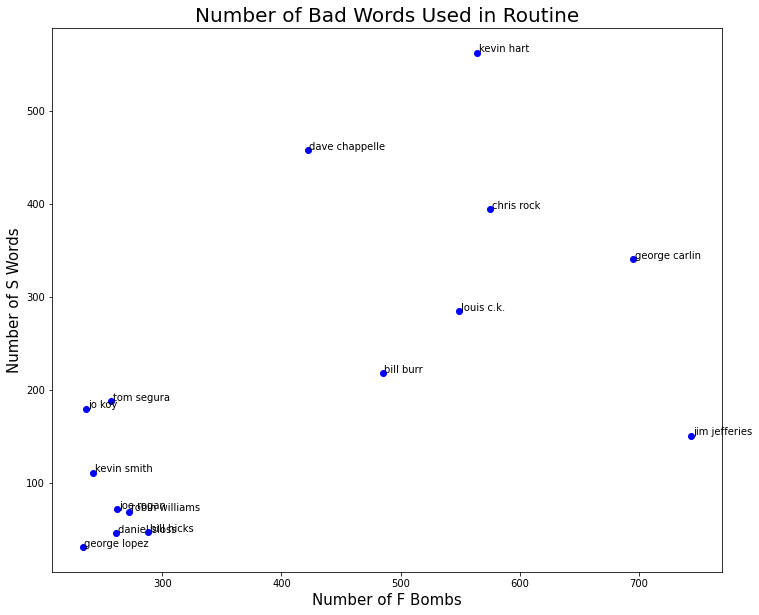

In [ ]:
plt.rcParams['figure.figsize'] = [12, 10]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, comedian, fontsize=10)
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()